# SP&500
### Base case. Study of the performance of the SP&500 in a long-term investment using the Vanguard S&P 500 ETF.

In [4]:
import yfinance as yf
import pandas as pd
import locale
import matplotlib.pyplot as plt
import requests
import pandas as pd
import numpy as np
from datetime import datetime
# this sets locale to the current Operating System value
locale.setlocale(locale.LC_ALL, '') 

'Spanish_Spain.1252'

## Downloading the data

The Vanguard S&P 500 ETF (Exchange-Traded Fund) is an exchange-traded fund that seeks to replicate the performance of the Standard & Poor's 500 Index (S&P 500), one of the most widely followed and widely used benchmarks for the U.S. stock market.

In [5]:
voo_etf = yf.download("VOO", start="2011-01-01", end="2024-01-01", interval="1mo")
display(voo_etf)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-01,115.940002,119.220001,115.480003,117.699997,92.095169,4402150
2011-02-01,118.480003,123.220001,118.379997,121.779999,95.287598,2761400
2011-03-01,122.279999,122.300003,114.639999,121.239998,94.865074,3866600
2011-04-01,122.120003,124.879997,118.440002,124.800003,98.087891,2302350
2011-05-01,125.440002,125.440002,120.160004,123.339996,96.940369,2455100
...,...,...,...,...,...,...
2023-08-01,419.260010,420.079987,397.850006,413.829987,409.246765,87472600
2023-09-01,416.459991,416.880005,389.450012,392.700012,388.350800,85361800
2023-10-01,391.899994,402.500000,375.950012,384.170013,381.364624,112733000


## Vanguard S&P 500 Dividends

In [6]:
dividend_history = yf.Ticker("VOO").dividends
print(dividend_history)

Date
2010-09-24 00:00:00-04:00    0.558
2010-12-27 00:00:00-05:00    0.526
2011-03-25 00:00:00-04:00    0.536
2011-06-24 00:00:00-04:00    0.570
2011-09-23 00:00:00-04:00    0.580
2011-12-23 00:00:00-05:00    0.686
2012-03-26 00:00:00-04:00    0.570
2012-06-25 00:00:00-04:00    0.640
2012-09-24 00:00:00-04:00    0.686
2012-12-24 00:00:00-05:00    0.940
2013-03-22 00:00:00-04:00    0.670
2013-06-24 00:00:00-04:00    0.738
2013-09-23 00:00:00-04:00    0.786
2013-12-24 00:00:00-05:00    0.914
2014-03-24 00:00:00-04:00    0.779
2014-06-23 00:00:00-04:00    0.809
2014-09-22 00:00:00-04:00    0.876
2015-03-23 00:00:00-04:00    0.984
2015-06-22 00:00:00-04:00    0.902
2015-09-21 00:00:00-04:00    0.953
2015-12-21 00:00:00-05:00    1.092
2016-03-21 00:00:00-04:00    1.006
2016-06-21 00:00:00-04:00    0.953
2016-09-13 00:00:00-04:00    0.883
2016-12-22 00:00:00-05:00    1.296
2017-03-22 00:00:00-04:00    0.998
2017-06-23 00:00:00-04:00    1.010
2017-09-20 00:00:00-04:00    1.176
2017-12-26 00:0

c:\Users\adald\anaconda3\envs\notebook\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


## Historical cpi data
The data was taking by the Bureau of Labor Statistics. 

The Consumer Price Index (CPI) is a measure used to calculate the average change in prices of a basket of goods and services that consumers typically purchase, such as food, housing, transportation, health care and other common products and services.
The CPI is a key tool for measuring inflation in an economy. When the CPI rises, it indicates that prices are generally rising, which is interpreted as inflation.

In [7]:
api_key = 'd452de1977364817904402ad0ed7546d'
base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
series_id = 'CUUR0000SA0'
start_year = '2011'
end_year = '2023'
url = f"{base_url}{series_id}?startyear={start_year}&endyear={end_year}&registrationkey={api_key}"

In [8]:
# Map the month name to the number
month_map = {
    "January": "01",
    "February": "02",
    "March": "03",
    "April": "04",
    "May": "05",
    "June": "06",
    "July": "07",
    "August": "08",
    "September": "09",
    "October": "10",
    "November": "11",
    "December": "12"
}

# Request
response = requests.get(url)
if response.status_code == 200:
    data = response.json()
    series_data = data['Results']['series'][0]['data']
    data_list = [{'year': point['year'], 'period': point['periodName'], 'value': point['value']} for point in series_data]
    df = pd.DataFrame(data_list)
    df['date'] = pd.to_datetime(df['year'] + '-' + df['period'].apply(lambda x: month_map[x]), format='%Y-%m')
    df.drop(columns=['year', 'period'], inplace=True)
    df = df[::-1]
    print(df)
else:
    print("Error en la solicitud:", response.status_code)


       value       date
155  220.223 2011-01-01
154  221.309 2011-02-01
153  223.467 2011-03-01
152  224.906 2011-04-01
151  225.964 2011-05-01
..       ...        ...
4    307.026 2023-08-01
3    307.789 2023-09-01
2    307.671 2023-10-01
1    307.051 2023-11-01
0    306.746 2023-12-01

[156 rows x 2 columns]


## Annual inflation rate

In [9]:
annual_inflation = df.groupby(df['date'].dt.year)['value'].agg(['first', 'last']).rename(columns={'first': 'cpi_start', 'last': 'cpi_end'})
annual_inflation[['cpi_start', 'cpi_end']] = annual_inflation[['cpi_start', 'cpi_end']].apply(pd.to_numeric)
annual_inflation['inflation_rate'] = ((annual_inflation['cpi_end'] - annual_inflation['cpi_start']) / annual_inflation['cpi_start']) * 100
display(annual_inflation)

,cpi_start,cpi_end,inflation_rate
date,,,
2011,220.223,225.672,2.474310
2012,226.665,229.601,1.295304
2013,230.280,233.049,1.202449
2014,233.916,234.812,0.383043
2015,233.707,236.525,1.205783
2016,236.916,241.432,1.906161
2017,242.839,246.524,1.517466
2018,247.867,251.233,1.357986
2019,251.712,256.974,2.090484


## Initial variables

In [10]:
initial_capital = 1000
monthly_contribution = 100

## Profit

The profit within an ETF are given by two factors:

1. Revaluation of underlying assets: If an ETF invests in stocks, bonds or other assets, gains may come from the revaluation of those assets.

2. Dividends. Dividends are portions of the profits that a company generates and distributes to its shareholders. If the ETF invests in dividend-paying stocks, gains may be derived from dividend payments received on those stocks.

3. If the ETF invests in bonds or other fixed income instruments, gains may be derived from interest earned on those bonds. Interest is distributed periodically to ETF investors in the form of interest payments.

Equity ETFs, such as the Vanguard S&P 500 ETF, do not typically earn interest directly, as they invest primarily in equities.

## Costs
When investing we have to take into account a series of costs:
Maintenance fee: A fee charged for the maintenance of your investment account, typically on a regular basis (e.g., monthly or annually).

* **Depository fee:** A fee charged by the depository institution responsible for holding and safeguarding your securities within your investment account.
* **Securities custody fee:** A fee charged for the safekeeping and custody of your securities within your investment account.
* **Inactivity fee:** A fee charged when there is no activity or insufficient activity in your investment account over a certain period of time.
* **Dividend collection fee:** A fee charged for the collection and processing of dividends paid out by the securities held within your investment account.
* **Currency exchange fee:** A fee charged for converting one currency to another, often applied when trading securities denominated in a currency different from your account's base currency.
* **Buy/sell commission:** A fee charged for executing buy or sell orders of securities within your investment account.
* **Securities transfer fee:** A fee charged for transferring securities from one investment account to another, typically when moving assets between different financial institutions.
* **Taxes:** Taxes payable after earning our profits

## Plataform
Let's invest in the S&P 500 vanguard from myInvestor

Why invest with myInvestor? There are many investment platforms, online brokers or banks that we can use to invest, but we chose myInvestor for these reasons:
1. **Low costs:** Buying and selling commission of 0.12% with no minimum investment and 0.30% currency exchange rate.
2. **Security:** Savings are guaranteed by the Spanish Deposit Guarantee Fund, provided for in Royal Decree 16/2011, October 14. It covers up to €100,000 per account and holder.
3. **No minimum investment in each operation:** Can be adapted to various investment profiles

In [11]:
buySell_comission = 0.12
current_exchange_rate = 0.30

## Metrics
Calculation of different metrics for strategy evaluation. Before calculating the metrics we will divide the data into 3 timelines to ensure that the outcome of the data is not manipulated by market conditions at a point in time.

In [12]:
# Vanguard S&P 500 data
sp500_df1 = voo_etf.loc[:'2014-12-01']
sp500_df1.index = pd.to_datetime(sp500_df1.index)
sp500_df2 = voo_etf.loc['2015-01-01':'2018-12-01']
sp500_df2.index = pd.to_datetime(sp500_df2.index)
sp500_df3 = voo_etf.loc['2019-01-01':]
sp500_df3.index = pd.to_datetime(sp500_df3.index)

# Dividens SP500 data
dividends_df1 = dividend_history.loc[:'2014-12-31']
dividends_df1.index = pd.to_datetime(dividends_df1.index)
dividends_df2 = dividend_history.loc['2015-01-01':'2018-12-31']
dividends_df2.index = pd.to_datetime(dividends_df2.index)
dividends_df3 = dividend_history.loc['2019-01-01':]
dividends_df3.index = pd.to_datetime(dividends_df3.index)


In [13]:
# This function sets the date to be month and year.
def dividendByYearAndMonth(data):
  df = pd.DataFrame(data)
  df['Date'] = pd.to_datetime(df.index)
  df.set_index('Date', inplace=True)
  df.index = df.index.strftime('%Y-%m')
  return df

In [14]:
# This function joins the ETF data with its dividends.
def joinDataAndDividends(data, dividends):
  dividends = dividendByYearAndMonth(dividends)
  dividends = dividends.reset_index()
  dividends['Date'] = pd.to_datetime(dividends['Date'])
  dividends['Year_Month'] = dividends['Date'].dt.to_period('M')
  data.index = pd.to_datetime(data.index)
  data['Year_Month'] = data.index.to_period('M')
  merged_df = pd.merge(data, dividends, on='Year_Month', how='left')
  merged_df.drop('Date', axis=1, inplace=True)
  merged_df.rename(columns={'Year_Month': 'Date'}, inplace=True)
  return merged_df


In [15]:
# The three timeline
df_timeline_df1 = joinDataAndDividends(sp500_df1, dividends_df1)
df_timeline_df2 = joinDataAndDividends(sp500_df2, dividends_df2)
df_timeline_df3 = joinDataAndDividends(sp500_df3, dividends_df3)
df_timelines = [df_timeline_df1, df_timeline_df2, df_timeline_df3]

C:\Users\adald\AppData\Local\Temp\ipykernel_17168\4073372256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year_Month'] = data.index.to_period('M')
C:\Users\adald\AppData\Local\Temp\ipykernel_17168\4073372256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year_Month'] = data.index.to_period('M')
C:\Users\adald\AppData\Local\Temp\ipykernel_17168\4073372256.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

### Example of timeline

In [16]:
display(df_timeline_df1)

,Open,High,Low,Close,Adj Close,Volume,Date,Dividends
0,115.940002,119.220001,115.480003,117.699997,92.095169,4402150,2011-01,NaN
1,118.480003,123.220001,118.379997,121.779999,95.287598,2761400,2011-02,NaN
2,122.279999,122.300003,114.639999,121.239998,94.865074,3866600,2011-03,0.536
3,122.120003,124.879997,118.440002,124.800003,98.087891,2302350,2011-04,NaN
4,125.440002,125.440002,120.160004,123.339996,96.940369,2455100,2011-05,NaN
5,123.040001,123.040001,115.540001,120.680000,94.849701,2549750,2011-06,0.570
6,120.739998,124.099998,117.440002,118.199997,93.352028,2977450,2011-07,NaN
7,119.779999,119.820000,100.919998,111.680000,88.202629,9424800,2011-08,NaN
8,111.739998,112.800003,102.379997,103.519997,81.758034,4571000,2011-09,0.580
9,102.820000,118.300003,98.239998,114.639999,91.049248,8390200,2011-10,NaN


### Total Return
Measures the total return generated by the strategy during the backtesting period. It is calculated as the percentage change in the value of the portfolio between the beginning and the end of the period.

In [17]:
def TotalReturn(df_timeline, initial_capital):
  operations = pd.DataFrame(columns=['Date', 'Price', 'Total'])
  comission = buySell_comission + current_exchange_rate
  total_return = initial_capital - (initial_capital * comission / 100)
  for _, row in df_timeline.iterrows():
    # Prive movement. 1 -> 100% and -1 -> -100%
    movement = (row['Close'] - row['Open']) / row['Open']
    total_return += total_return * movement
    total_return += monthly_contribution - (monthly_contribution * comission / 100)
    if not pd.isna(row['Dividends']):
      total_return += total_return * row['Dividends'] / 100 
    # Operation
    operations.loc[len(operations)] = {
      'Date': row['Date'],
      'Price': row['Open'],
      'Total': total_return
    }
  return {
    'total': total_return,
    'operations': operations
  }

In [18]:
data = []
for df_timeline in df_timelines:
  data.append(TotalReturn(df_timeline, initial_capital))

### Total return in each timeline

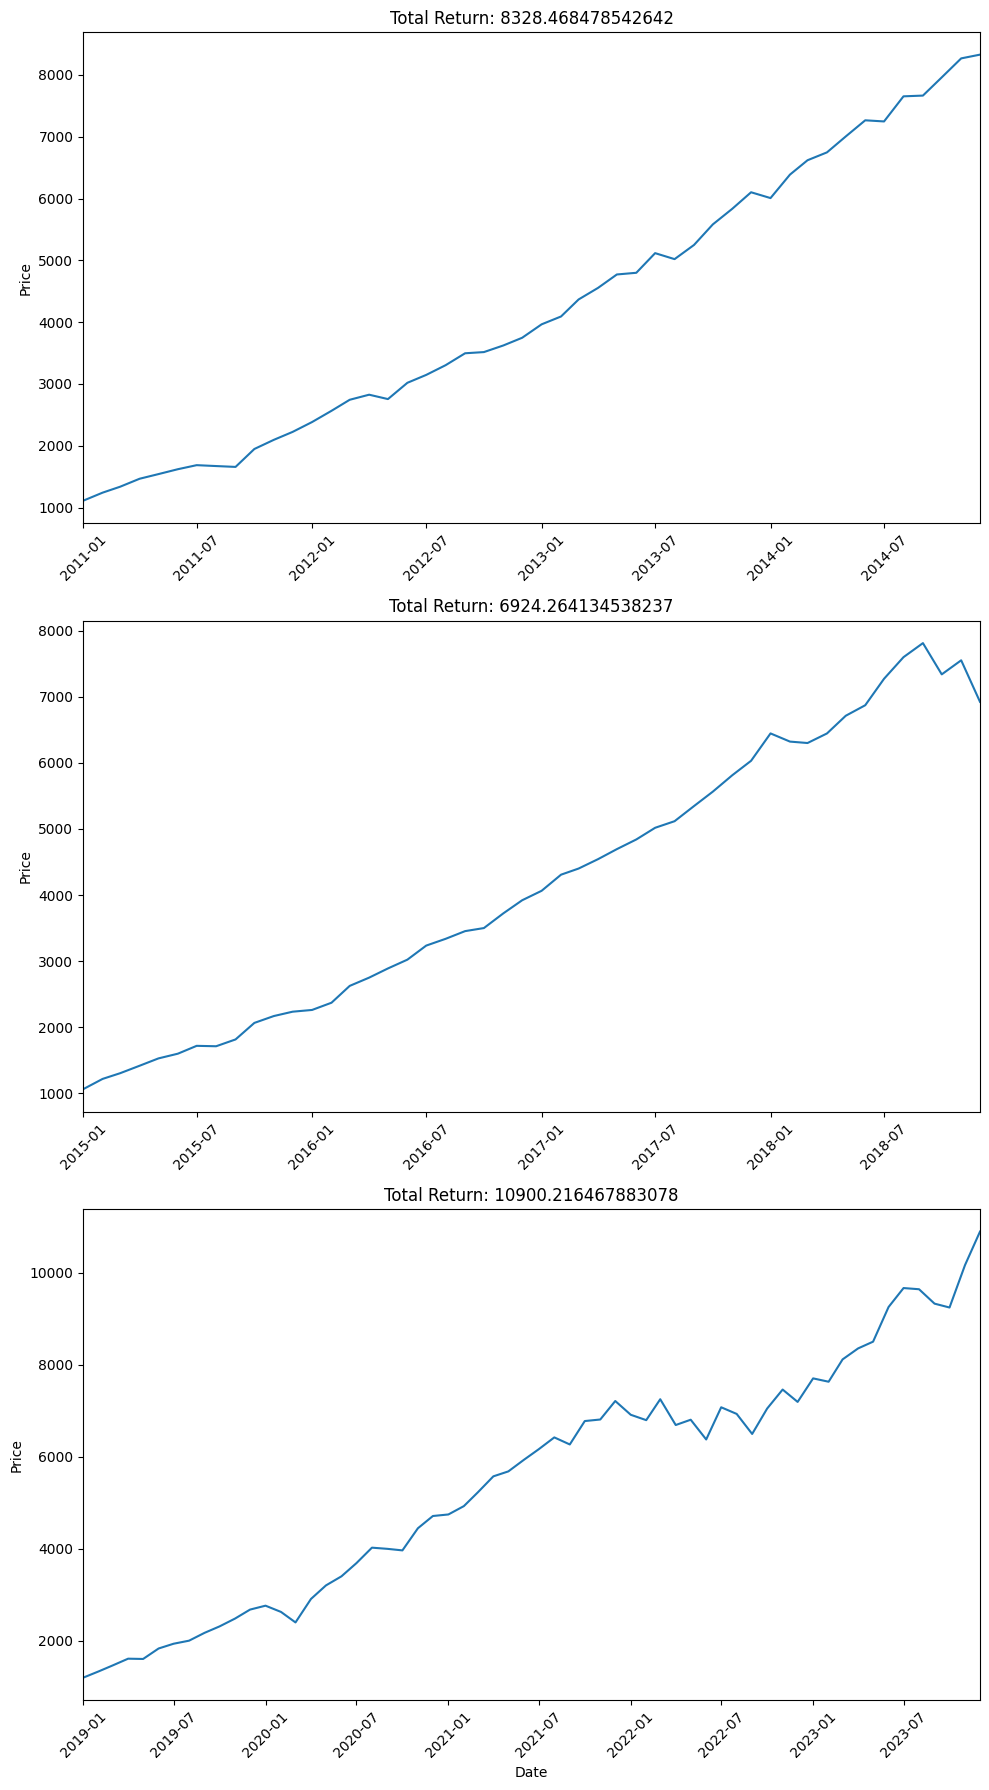

In [19]:
fig = plt.figure(figsize=(10, 6*len(data)))

for i, item in enumerate(data):
    operations = item['operations']
    operations['Date'] = operations['Date'].dt.to_timestamp()
    dates = operations['Date']
    total = operations['Total']
    ax = fig.add_subplot(len(data), 1, i+1)
    ax.plot(dates, total)
    ax.set_ylabel('Price')
    ax.set_title(f'Total Return: {item["total"]}')
    ax.set_xlim(min(dates), max(dates))
    ax.tick_params(axis='x', rotation=45)

plt.xlabel('Date')
plt.tight_layout()
plt.show()


### Total return value

In [20]:
total_values = [item['total'] for item in data]
total_return_mean = np.mean(total_values)
print('Total return mean: ', total_return_mean)

Total return mean:  8717.649693654652


## Comparison between saving money and investing it in the Vanguard sp500

In [21]:
def GetInflationRate(year):
  return annual_inflation.loc[year, 'inflation_rate']

In [22]:
def CalculateAccumulatedValue(num_months):
  accumulated_values = [initial_capital]
  for month in range(1, num_months):
    
    accumulated_value = accumulated_values[-1] + monthly_contribution
    if month % 12 == 0:
      current_year = int(start_year) + (month // 12) - 1
      inflation_rate = GetInflationRate(current_year)
      accumulated_value = accumulated_value - (accumulated_value * inflation_rate) / 100
    accumulated_values.append(accumulated_value)
  return accumulated_values

In [23]:
def CalculateAccumulatedTotalReturn(num_months):
  total = initial_capital
  for month in range(1, num_months):
    
    total = total + monthly_contribution
    if month % 12 == 0:
      current_year = int(start_year) + (month // 12) - 1
      inflation_rate = GetInflationRate(current_year)
      total = total - (total * inflation_rate) / 100
  return total

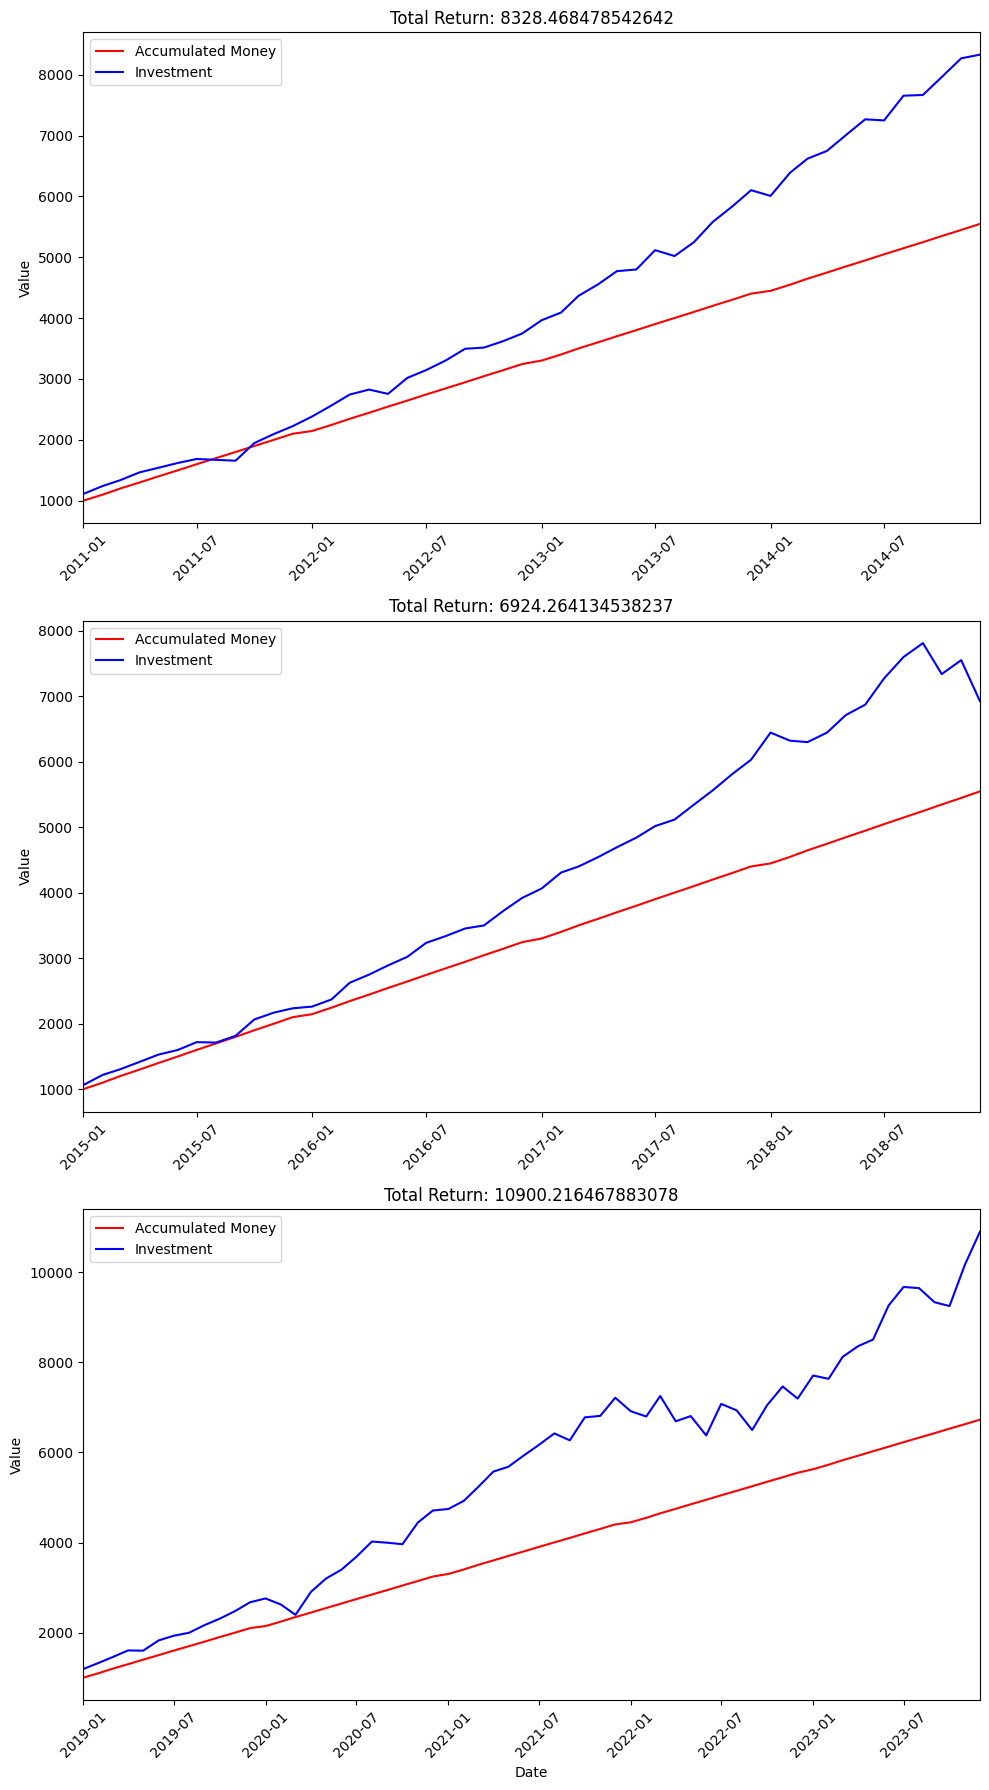

In [24]:
fig = plt.figure(figsize=(10, 6*len(data)))

for i, item in enumerate(data):
    operations = item['operations']
    dates = operations['Date']
    total = operations['Total']
    num_months = len(dates)
    accumulated_values = CalculateAccumulatedValue(num_months)
    ax = fig.add_subplot(len(data), 1, i+1)
    ax.plot(dates, accumulated_values, label='Accumulated Money', color='red')
    ax.plot(dates, total, label='Investment', color='blue')
    ax.set_ylabel('Value')
    ax.set_title(f'Total Return: {item["total"]}')
    ax.set_xlim(min(dates), max(dates))
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

plt.xlabel('Date')
plt.tight_layout()
plt.show()

## Annualized Return 
Provides a view of the average return per year. This is important for comparing strategies over different time periods

In [25]:
def AnnualizedReturn(df, start_year, end_year):
  total_annual_profit = []
  capital = initial_capital + monthly_contribution * 12
  for year in range(start_year, end_year + 1):
    filtered_data = df.loc[df['Date'].dt.year == year]
    total_return_after_one_year = TotalReturn(filtered_data, capital)
    capital += monthly_contribution * 12
    variation = (total_return_after_one_year['total'] - capital) / capital * 100
    capital = total_return_after_one_year['total']
    total_annual_profit.append({
      'year': year,
      'variation': variation
    })
  return total_annual_profit


In [26]:
def MeanAnnualizedReturn(annual_returns): 
  variations = [entry['variation'] for entry in annual_returns]
  return np.mean(variations)

In [27]:
def AnnualizadReturnGraphic(annual_returns):
  years = [entry['year'] for entry in annual_returns]
  variations = [entry['variation'] for entry in annual_returns]

  # Calcula variaciones negativas y positivas
  positive_variations = [max(v, 0) for v in variations]
  negative_variations = [min(v, 0) for v in variations]

  # Aqui es donde falla. No está pintando las barras rojas
  plt.bar(years, positive_variations, color='green')
  plt.bar(years, negative_variations, color='red', alpha=0.7)
  
  plt.xlabel('Year')
  plt.ylabel('Variation (%)')
  plt.title('Annual Return')
  plt.grid(True)
  plt.show()

In [28]:
annual_returns_df1 = AnnualizedReturn(df_timeline_df1, 2011, 2014)
annual_returns_df2 = AnnualizedReturn(df_timeline_df2, 2015, 2018)
annual_returns_df3 = AnnualizedReturn(df_timeline_df3, 2019, 2023)

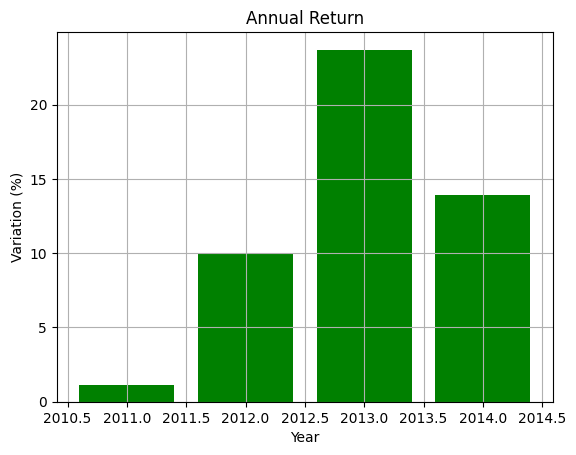

Mean annualize return:  12.162030400186211


In [29]:
AnnualizadReturnGraphic(annual_returns_df1)
print('Mean annualize return: ', MeanAnnualizedReturn(annual_returns_df1))

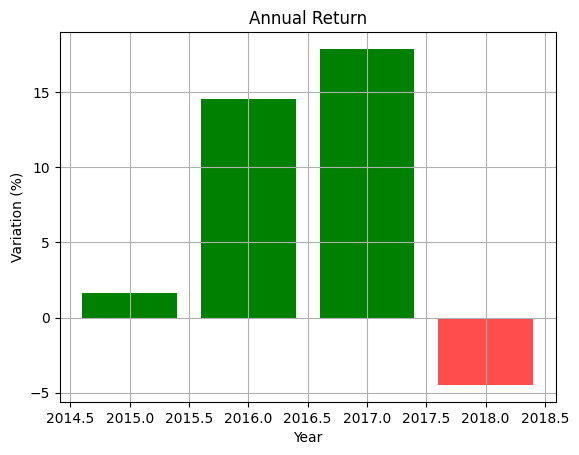

Mean annualize return:  7.383140247428172


In [30]:
AnnualizadReturnGraphic(annual_returns_df2)
print('Mean annualize return: ', MeanAnnualizedReturn(annual_returns_df2))

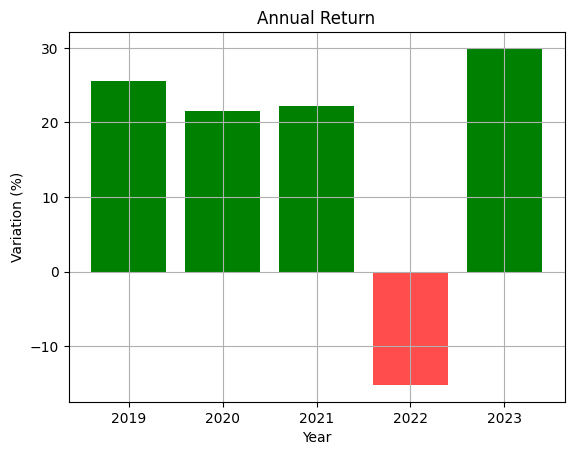

Mean annualize return:  16.793505653497512


In [31]:
AnnualizadReturnGraphic(annual_returns_df3)
print('Mean annualize return: ', MeanAnnualizedReturn(annual_returns_df3))

### Mean Annualized Return

In [32]:
annualized_return = [MeanAnnualizedReturn(annual_returns_df1), MeanAnnualizedReturn(annual_returns_df2), MeanAnnualizedReturn(annual_returns_df3)]
print("Total mean annualized return: ", np.mean(annualized_return))

Total mean annualized return:  12.112892100370631


## Volatility 
Measures the degree of variation in the strategy's returns, which provides an idea of the associated risk. Higher volatility implies higher risk.

In [33]:
names = ["df_timeline_df1", "df_timeline_df2", "df_timeline_df3"]
array_volatility = []

for index, item in enumerate(data):
    returns = item['operations']['Total'].pct_change()
    volatility = returns.std() * 100
    array_volatility.append({"name": names[index], "volatility (%)": volatility})

In [34]:
df_volatility = pd.DataFrame(array_volatility)
display(df_volatility)

,name,volatility (%)
0,df_timeline_df1,3.696062
1,df_timeline_df2,3.937063
2,df_timeline_df3,5.862710


In [35]:
def experatedGrowRateValues(grow_rate, years):
  values = []
  monthly_grow_rate = grow_rate / 12
  total = initial_capital
  for i in range(1, years * 12 + 1):
    total += total * (monthly_grow_rate / 100) + monthly_contribution
    values.append(total)
  return values

print(len(experatedGrowRateValues(MeanAnnualizedReturn(annual_returns_df1), 4)))

48


In [36]:
def showScatterPlot(index, annual_return, years):
    fig = plt.figure(figsize=(10, 6*len(data)))

    operations = data[index]['operations']
    dates = operations['Date']
    total = operations['Total']

    ax = fig.add_subplot(len(data), 1, i+1)
    ax.plot(dates, experatedGrowRateValues(MeanAnnualizedReturn(annual_return), years), label='Accumulated Money', color='red')
    ax.plot(dates, total, label='Investment', color='blue')
    ax.set_ylabel('Value')
    ax.set_title(f'Total Return: {item["total"]}')
    ax.set_xlim(min(dates), max(dates))
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

    plt.xlabel('Date')
    plt.tight_layout()
    plt.show()

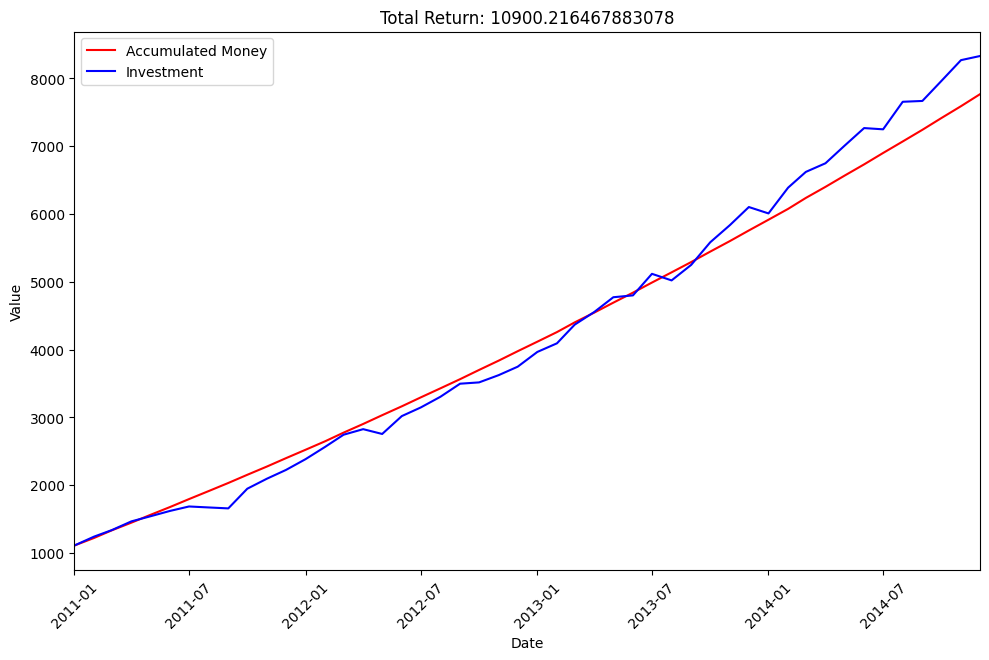

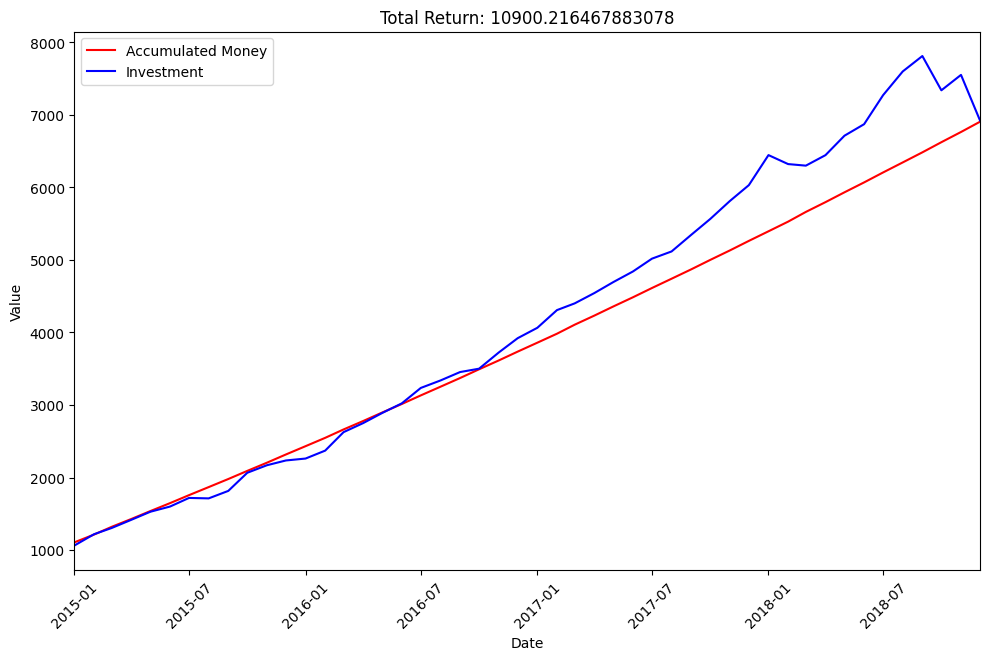

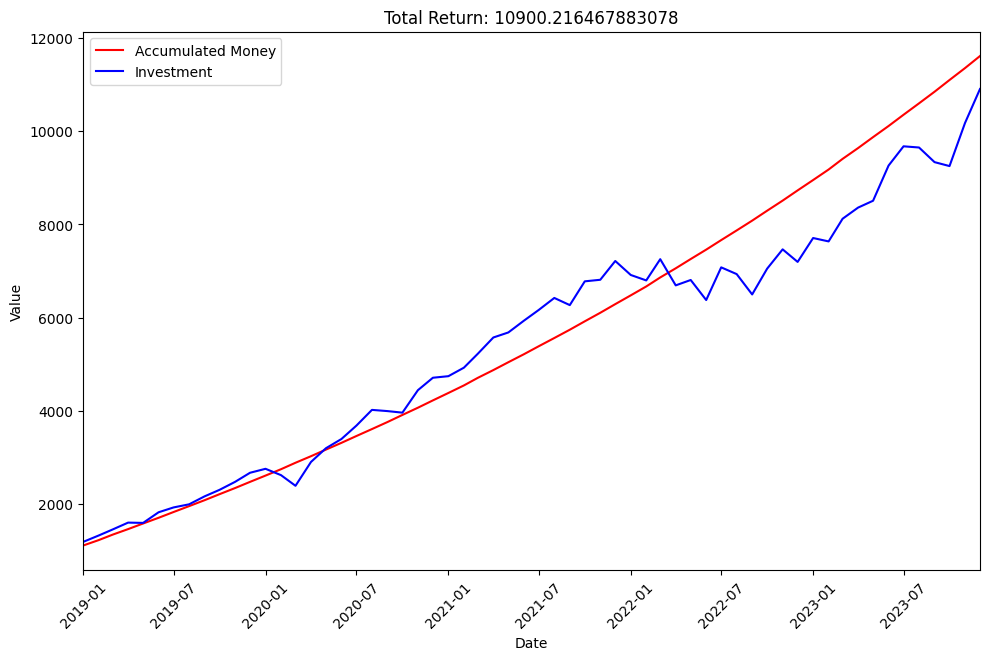

In [37]:
showScatterPlot(0, annual_returns_df1, 4)
showScatterPlot(1, annual_returns_df2, 4)
showScatterPlot(2, annual_returns_df3, 5)

## Maximum Loss
It is the largest drop from a peak to a trough in the portfolio value during the backtesting period. It indicates the maximum risk an investor would have faced.

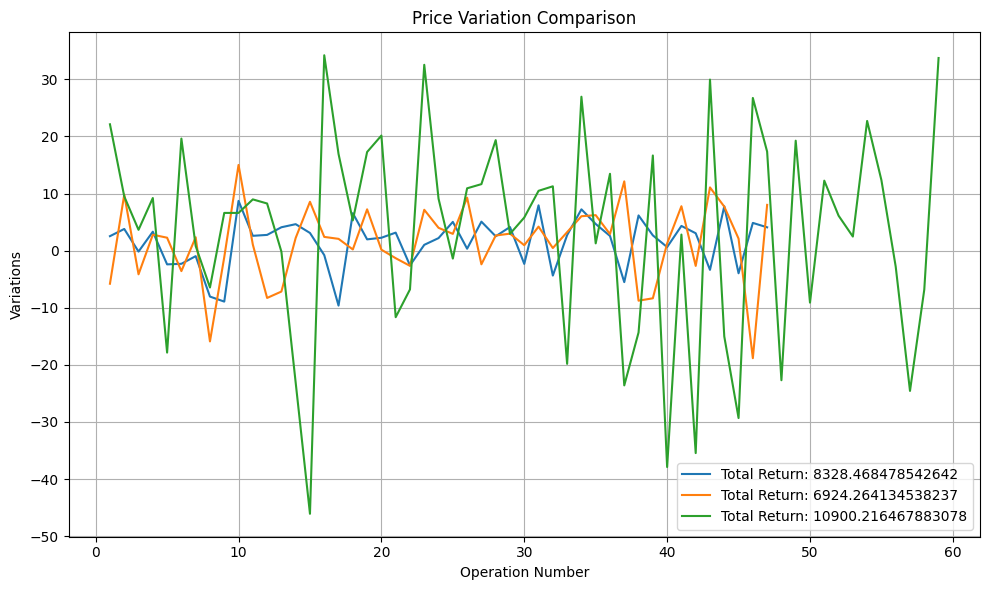

In [38]:
plt.figure(figsize=(10, 6))

max_loss_values = []

for i, item in enumerate(data):
    operations = item['operations']
    # Price variation
    price_diff = operations['Price'].diff()
    max_loss_values.append(np.min(price_diff))
    plt.plot(price_diff, label=f'Total Return: {item["total"]}')

plt.xlabel('Operation Number')
plt.ylabel('Variations')
plt.title('Price Variation Comparison')

plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()



In [39]:
names = ["df_timeline_df1", "df_timeline_df2", "df_timeline_df3"]
values = []
for index, item in enumerate(data):
    values.append({"name": names[index], "maximun_loss (%)": max_loss_values[index]})

df_maximun_loss = pd.DataFrame(values)
display(df_maximun_loss)

maximun_losses = [entry['maximun_loss (%)'] for entry in values]
print("Average maximum loss: ", np.mean(maximun_losses))

,name,maximun_loss (%)
0,df_timeline_df1,-9.620003
1,df_timeline_df2,-18.829987
2,df_timeline_df3,-46.080002


Average maximum loss:  -24.84333038330078


## Sharpe Ratio
Compares the return earned in excess of the risk-free yield (such as government bonds) with respect to volatility:

* **Less than 1:** This indicates that the investment return is less than the risk-free rate, suggesting that the investor could have earned a better return by simply investing in risk-free assets, such as government bonds.
* **Around 1:** A Sharpe Ratio of around 1 suggests that the investment return adequately compensates for the risk taken. This is an acceptable balance between risk and return.
* **More than 1:** A Sharpe Ratio greater than 1 indicates that the investment return is higher than the risk-free rate, suggesting that the investor is being compensated for the additional risk taken.
* **Higher is better:** In general, a higher Sharpe Ratio is better because it indicates a higher return relative to risk.

In [40]:
risk_free_rate = 3
def sharpeRatio(index):
  return (np.mean(annualized_return) - risk_free_rate) / array_volatility[index]['volatility (%)']

sharpeRatioValues = [sharpeRatio(0), sharpeRatio(1), sharpeRatio(2)]
for index, item in enumerate(sharpeRatioValues):
  print(f'Sharpe ratio {index + 1} period: ', item)

print('Sharpe ratio mean: ', np.mean(sharpeRatioValues))

Sharpe ratio 1 period:  2.4655680338509818
Sharpe ratio 2 period:  2.3146423554036812
Sharpe ratio 3 period:  1.5543821524240136
Sharpe ratio mean:  2.1115308472262253


## Sortino Ratio

In [41]:
def sortino_ratio(returns, risk_free_rate, target_return=0):
    downside_returns = np.minimum(returns - target_return, 0)
    downside_std = np.std(downside_returns)
    
    if downside_std == 0:
        return np.nan
    
    return (returns.mean() - risk_free_rate) / downside_std

for index, item in enumerate(data):
    returns = item['operations']['Total'].pct_change().dropna()
    sortino = sortino_ratio(returns, risk_free_rate)
    print("Sortino Ratio:", sortino)


Sortino Ratio: -574.8504326369709
Sortino Ratio: -199.23031869115823
Sortino Ratio: -145.34259456142817


## Alpha and Beta 
- Alpha measures the strategy's performance compared to a benchmark index, adjusted for risk. 
- Beta measures the sensitivity of the strategy's returns to movements

In [49]:
betas = []
alphas = []
for index, strategy_return in enumerate(annualized_return):
  cov = strategy_return - risk_free_rate
  var_market = array_volatility[0]['volatility (%)'] ** 2
  beta = cov / var_market
  capital = CalculateAccumulatedTotalReturn(len(data[index]['operations']['Date']))
  total_return = TotalReturn(df_timelines[index], initial_capital)['total']
  profit = (total_return - capital) / total_return * 100
  alpha = profit - (risk_free_rate + beta * (strategy_return - risk_free_rate))
  betas.append(beta)
  alphas.append(alpha)
  
print('Betas: ', betas)
print('Alphas: ', alphas)

Betas:  [0.6706767540637852, 0.32085358215922494, 1.009708895820752]
Alphas:  [24.239234865593527, 15.468274156791539, 21.363173822124878]


## Information Ratio
It compares the additional returns of a strategy with respect to a benchmark index, relative to the volatility of those additional returns.

In [55]:
def informationRatio(strategy_performance, dst_excess_perfomance):
  excess_performance = strategy_performance - risk_free_rate
  return excess_performance / dst_excess_performance

information_ratio_data = [
  informationRatio(MeanAnnualizedReturn(annual_returns_df1), array_volatility[0]['volatility (%)']),
  informationRatio(MeanAnnualizedReturn(annual_returns_df2), array_volatility[1]['volatility (%)']),
  informationRatio(MeanAnnualizedReturn(annual_returns_df3), array_volatility[2]['volatility (%)'])
]

print()
print(informationRatio(MeanAnnualizedReturn(annual_returns_df2), array_volatility[1]['volatility (%)']))
print(informationRatio(MeanAnnualizedReturn(annual_returns_df3), array_volatility[2]['volatility (%)']))

2.478862805689458
1.1858947042185493
3.7319465916449386


In [ ]:
print('Mean information ratio: ', np.mean())